In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from pprint import pprint

In [17]:
# function to build summary dataframe by city type
def build_merged_df(type_df):
    type_fare_df = type_df[["city", "fare"]]
    type_ride_df = type_df[["city", "ride_id"]]
    type_driver_df = type_df[["city", "driver_count"]]

    # Average fare by city type
    type_group_fare = type_fare_df.groupby(["city"])
    type_fare_avg_df = pd.DataFrame(type_group_fare.mean()["fare"])
    type_fare_avg_df = type_fare_avg_df.rename(columns={"fare": "Average Fare"})

    # Total rides by city type
    type_group_ride = type_ride_df.groupby(["city"])
    type_ride_total_df = pd.DataFrame(type_group_ride.count()["ride_id"])
    type_ride_total_df = type_ride_total_df.rename(columns={"ride_id": "Total Rides"})

    # Driver count by city type
    # No need to groupby and count, count already provided in data
    # Just drop duplicates so we have one row per city
    type_driver_count_df = type_driver_df.drop_duplicates()
    type_driver_count_df = type_driver_count_df.rename(columns={"driver_count": "Driver Count"})
    type_driver_count_df["Driver Count"] = type_driver_count_df["Driver Count"] * 10

    # Merge the type dataframes
    type_merge_df = pd.merge(type_fare_avg_df, type_ride_total_df, on="city")
    type_merge_df = pd.merge(type_merge_df, type_driver_count_df, on="city")
    
    return type_merge_df

In [18]:
# File to Load (Remember to change these)
city_csv = os.path.join("data", "city_data.csv")
ride_csv = os.path.join("data", "ride_data.csv")

# Read the City and Ride Data
city_df = pd.read_csv(city_csv)
ride_df = pd.read_csv(ride_csv)

# Combine the data into a single dataset
pyber_df = pd.merge(ride_df, city_df, on="city", how="left")
pyber_df.head()

# Display the data table for preview

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [19]:
# Obtain the x and y coordinates for each of the three city types
urban_df = pyber_df[pyber_df["type"] == "Urban"]
urban_merge_df = build_merged_df(urban_df)

suburban_df = pyber_df[pyber_df["type"] == "Suburban"]
suburban_merge_df = build_merged_df(suburban_df)

rural_df = pyber_df[pyber_df["type"] == "Rural"]
rural_merge_df = build_merged_df(rural_df)

pprint(urban_merge_df.head())
#pprint(suburban_merge_df.head())
#pprint(rural_merge_df.head())

              city  Average Fare  Total Rides  Driver Count
0      Amandaburgh     24.641667           18           120
1      Barajasview     25.332273           22           260
2      Carriemouth     28.314444           27           520
3  Christopherfurt     24.501852           27           410
4        Deanville     25.842632           19           490


<IPython.core.display.Javascript object>


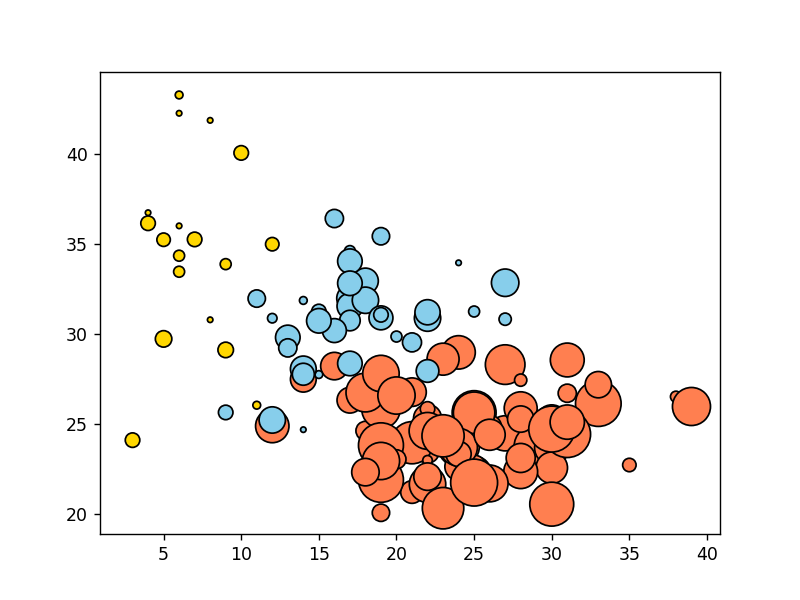

In [20]:
# Build the scatter plots for each city types
plt.scatter(urban_merge_df["Total Rides"], urban_merge_df["Average Fare"],
            marker = "o", facecolor="coral", edgecolor="black",
            s=urban_merge_df["Driver Count"])

plt.scatter(suburban_merge_df["Total Rides"], suburban_merge_df["Average Fare"],
            marker = "o", facecolor="skyblue", edgecolor="black",
            s=suburban_merge_df["Driver Count"])

plt.scatter(rural_merge_df["Total Rides"], rural_merge_df["Average Fare"],
            marker = "o", facecolor="gold", edgecolor="black",
            s=rural_merge_df["Driver Count"])

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure

In [ ]:
# Show plot
plt.show()

## Total Fares by City Type

In [ ]:
# Calculate Type Percents

# Build Pie Chart

# Save Figure


In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


In [ ]:
# Show Figure
plt.show()